In [2]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exploratory Data Analysis And Data Manipulation


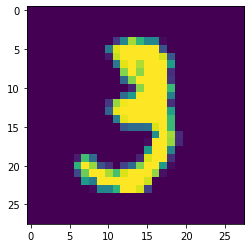

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10])

In [4]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

#reshape data
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
y_train = y_train.reshape(y_train.shape[0],-1)
y_test = y_test.reshape(y_test.shape[0],-1)


print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
x_train.shape[0]

x_train_temp = np.zeros((300,784))
x_test_temp = np.zeros((300,784))
y_train_temp = np.zeros((300,1))
y_test_temp = np.zeros((300,1))


data_train = np.concatenate((x_train_temp,x_test_temp),axis = 0)
data_test = np.concatenate((y_train_temp,y_test_temp),axis = 0)
data = np.concatenate((data_train, data_test),axis = 1)

# data arrayi mini-batchler oluşturmak için

# bu kod parçasında data boyutunu azalttım 
for i in range(300):
    for q in range(784):
        x_train_temp[i][q] = x_train[i][q]
        x_test_temp[i][q] = x_test[i][q]
for i in range(300):
    y_train_temp[i][0] = y_train[i][0]
    y_test_temp[i][0] = y_test[i][0]
x_train_temp

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
(60000, 784)
(60000, 1)
(10000, 1)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [6]:
print(x_train_df.describe())
print(x_test_df.describe())
print(y_train_df.describe())
print(y_test_df.describe())

           0        1        2        3        4        5        6        7    \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.200433      0.088867      0.045633   
std        0.0      0.0  ...      6.042472      

In [7]:
print(x_train_df.isna().any().any())
print(x_test_df.isna().any().any())
print(y_train_df.isna().any().any())
print(y_test_df.isna().any().any())

False
False
False
False


In [8]:
print(x_train_df.shape)
print(x_test_df.shape)
print(y_train_df.shape)
print(y_test_df.shape)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


In [9]:
print(x_train_df.info())
print(x_test_df.info())
print(y_train_df.info())
print(y_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 7.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60000 non-null  uint8
dtypes: uint8(1)
memory usage: 58.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
None


# Training Of The Classifier


In [10]:
from logreg import LogisticRegression
logreg = LogisticRegression(learning_rate = 0.01,epoch = 10,batch_size = 2)

In [12]:
#Bu kısımda veri boyunu küçülttüğüm arrayler ile fit ve predict işlemi yaptım fakat 
#buradaki problemde veri setinin doğru ayrılamaması
parameters = logreg.fit(x_train_temp, y_train_temp, x_test_temp,y_test_temp,data)
logreg.predict(y_test_temp,x_test_temp,parameters)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [13]:
parameters = logreg.fit(x_train, y_train, x_test,y_test,data,)
logreg.predict(y_test,x_test,parameters)

#Veri seti çok büyük olduğundan dolayı işlem tamamlnamıyor

MemoryError: Unable to allocate 26.8 GiB for an array with shape (60000, 60000) and data type float64